In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot
from numpy import *

import scipy

import matplotlib.pyplot as plt
from matplotlib import pyplot

from pylab import rcParams

import urllib

import os
from datetime import datetime

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.feature_selection import SelectFromModel

!pip install pydot
import pydot
!pip install graphviz

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import seaborn as sb



C:\Users\vnnair\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 28, 20
plt.style.use('seaborn-whitegrid')

In [4]:
# if using Windows:
path_to_train = r'C:\Users\vnnair\Documents\WORK\F3Team\AdHoc\UMD1 Lost Sales\Data.csv'

# if using Windows:
#path_to_test = r'C:\Users\vnnair\Documents\WORK\AdHoc\UMD1 Lost Sales\TestData.csv'

In [5]:
Train = pd.read_csv(path_to_train)

Train.head(10)

#Test = pd.read_csv(path_to_test)

#Test.head(10)

,Date,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3
0,12/15/2017,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89
1,12/16/2017,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07
2,12/17/2017,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91
3,12/18/2017,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98
4,12/19/2017,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96
5,12/20/2017,24445.24,40353.85,52848.30,19448.10,37150.38,28048.29,29798.16
6,12/21/2017,30787.56,55832.12,66154.38,27877.58,57117.80,33582.25,35903.70
7,12/22/2017,45942.26,71721.52,73365.15,35044.37,60559.16,43227.13,48423.76
8,12/23/2017,76919.39,105447.14,70848.69,54465.23,85958.74,77579.22,73526.24
9,12/24/2017,81834.80,114736.28,27620.91,69926.39,86055.93,82427.66,78166.87


# Creating Dummy Variables

In [6]:
train_df = pd.DataFrame(Train)
train_df
#test_df = pd.DataFrame(Test)
#test_df.head()

,Date,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3
0,12/15/2017,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89
1,12/16/2017,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07
2,12/17/2017,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91
3,12/18/2017,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98
4,12/19/2017,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96
5,12/20/2017,24445.24,40353.85,52848.30,19448.10,37150.38,28048.29,29798.16
6,12/21/2017,30787.56,55832.12,66154.38,27877.58,57117.80,33582.25,35903.70
7,12/22/2017,45942.26,71721.52,73365.15,35044.37,60559.16,43227.13,48423.76
8,12/23/2017,76919.39,105447.14,70848.69,54465.23,85958.74,77579.22,73526.24
9,12/24/2017,81834.80,114736.28,27620.91,69926.39,86055.93,82427.66,78166.87


In [7]:
train_df['Date'] = pd.to_datetime(train_df['Date'])
#test_df['Date'] = pd.to_datetime(test_df['Date'])

In [8]:
#Converting variables to numbers
train_df["UMD1"] = pd.to_numeric(train_df.UMD1, errors='coerce')
train_df["UVA1"] = pd.to_numeric(train_df.UVA1, errors='coerce')
train_df["BWI6"] = pd.to_numeric(train_df.BWI6, errors='coerce')
train_df["UCA8"] = pd.to_numeric(train_df.UCA8, errors='coerce')
train_df["UTX5"] = pd.to_numeric(train_df.UTX5, errors='coerce')
train_df["UVA2"] = pd.to_numeric(train_df.UVA2, errors='coerce')
train_df["UVA3"] = pd.to_numeric(train_df.UVA3, errors='coerce')

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
Date    501 non-null datetime64[ns]
UMD1    323 non-null float64
UVA1    501 non-null float64
BWI6    500 non-null float64
UCA8    501 non-null float64
UTX5    501 non-null float64
UVA2    500 non-null float64
UVA3    500 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 31.4 KB


In [10]:
train_df['oldestdate'] = min(train_df['Date'])
#test_df['oldestdate'] = min(train_df['Date'])
#test_df.head()

In [11]:
#Adding oldest date in dataset
train_df['dayssince'] = train_df['Date'] - train_df['oldestdate']  
train_df['days_from_start'] = train_df['dayssince'] / np.timedelta64(1, 'D')
train_df['days_from_start'].head()
train_df.head()

#test_df['dayssince'] = test_df['Date'] - test_df['oldestdate']  
#test_df['days_from_start'] = test_df['dayssince'] / np.timedelta64(1, 'D')
#test_df['days_from_start'].head()
#test_df.head()

,Date,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,oldestdate,dayssince,days_from_start
0,2017-12-15,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89,2017-12-15,0 days,0.0
1,2017-12-16,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07,2017-12-15,1 days,1.0
2,2017-12-17,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91,2017-12-15,2 days,2.0
3,2017-12-18,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98,2017-12-15,3 days,3.0
4,2017-12-19,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96,2017-12-15,4 days,4.0


In [12]:
train_df['dotw'] = train_df['Date'].dt.day_name()
train_df['month'] = train_df['Date'].dt.strftime('%b')
#needed to use different format because using older version of pandas
train_df['year'] = train_df['Date'].apply(lambda x: x.year)

#test_df['dotw'] = test_df['Date'].dt.day_name()
#test_df['month'] = test_df['Date'].dt.strftime('%b')
#needed to use different format because using older version of pandas
#test_df['year'] = test_df['Date'].apply(lambda x: x.year)

In [13]:
dotw_dummies = pd.get_dummies(train_df['dotw'])
month_dummies = pd.get_dummies(train_df['month'])
year_dummies = pd.get_dummies(train_df['year'])

#dotw_dummies2 = pd.get_dummies(test_df['dotw'])
#month_dummies2 = pd.get_dummies(test_df['month'])
#year_dummies2 = pd.get_dummies(test_df['year'])

In [14]:
train_df.head()

,Date,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,oldestdate,dayssince,days_from_start,dotw,month,year
0,2017-12-15,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89,2017-12-15,0 days,0.0,Friday,Dec,2017
1,2017-12-16,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07,2017-12-15,1 days,1.0,Saturday,Dec,2017
2,2017-12-17,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91,2017-12-15,2 days,2.0,Sunday,Dec,2017
3,2017-12-18,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98,2017-12-15,3 days,3.0,Monday,Dec,2017
4,2017-12-19,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96,2017-12-15,4 days,4.0,Tuesday,Dec,2017


In [15]:
#Concatenated all the dummy variable tables, dropped all confounding or duplicate variables

train_df2 = pd.concat([train_df, dotw_dummies, month_dummies, year_dummies], axis=1)
train_df2.drop(['Date', 'oldestdate', 'dayssince', 'dotw', 'month', 'year', 'Friday', 'Jun', 2017], inplace=True, axis=1)
train_df2.head()

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
0,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
where_are_NaNs = isnan(train_df2)
train_df2[where_are_NaNs] = 0

In [17]:
#Concatenated all the dummy variable tables, dropped all confounding or duplicate variables

#test_df2 = pd.concat([test_df, dotw_dummies2, month_dummies2, year_dummies2], axis=1)
#test_df2.drop(['Date', 'oldestdate', 'dayssince', 'dotw', 'month', 'year', 'Friday'], inplace=True, axis=1)
#test_df2.head()

# Splitting up between training and test

In [18]:
train_df2.describe()

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,14782.509421,45518.755788,98767.843253,17793.533673,22900.174052,23310.224232,22277.029461,250.000000,0.143713,0.143713,...,0.111776,0.123752,0.061876,0.123752,0.061876,0.059880,0.061876,0.059880,0.728543,0.237525
std,12121.724877,12818.328520,28007.148060,4947.949138,7159.716963,6415.878247,6275.561365,144.770508,0.351149,0.351149,...,0.315406,0.329628,0.241171,0.329628,0.241171,0.237502,0.241171,0.237502,0.445156,0.425992
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36785.950000,80005.130000,15208.630000,19332.850000,19856.250000,18678.120000,125.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19015.110000,43420.510000,95717.010000,17114.780000,21689.060000,22230.350000,21345.570000,250.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,23166.560000,51475.180000,115730.580000,19688.190000,25162.400000,25740.320000,24735.850000,375.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,81834.800000,139621.190000,187539.540000,69926.390000,86055.930000,82427.660000,78166.870000,500.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
Train1 = train_df2.iloc[0:323, :]
Test1 = train_df2.iloc[323:520, :] 

In [23]:
Train1_df = pd.DataFrame(Train1)
Test1_df = pd.DataFrame(Test1)

In [24]:
Train1_df

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
0,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,24445.24,40353.85,52848.30,19448.10,37150.38,28048.29,29798.16,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30787.56,55832.12,66154.38,27877.58,57117.80,33582.25,35903.70,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,45942.26,71721.52,73365.15,35044.37,60559.16,43227.13,48423.76,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,76919.39,105447.14,70848.69,54465.23,85958.74,77579.22,73526.24,8.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,81834.80,114736.28,27620.91,69926.39,86055.93,82427.66,78166.87,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
Test1_df

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
323,0.0,46244.07,104861.89,21214.65,21465.20,25982.09,23207.76,323.0,0,1,...,0,0,0,0,0,1,0,0,1,0
324,0.0,46181.63,132077.60,22493.94,24550.70,26283.55,21823.73,324.0,0,0,...,0,0,0,0,0,1,0,0,1,0
325,0.0,35657.58,134056.68,14254.75,17537.22,15921.26,16936.62,325.0,1,0,...,0,0,0,0,0,1,0,0,1,0
326,0.0,36527.09,86443.63,16402.85,15776.66,17621.81,16802.21,326.0,0,0,...,0,0,0,0,0,1,0,0,1,0
327,0.0,32084.98,65964.97,16117.15,19458.85,14465.96,16186.02,327.0,0,0,...,0,0,0,0,0,1,0,0,1,0
328,0.0,36038.90,73095.57,15054.33,20662.20,17392.78,15467.30,328.0,0,0,...,0,0,0,0,0,1,0,0,1,0
329,0.0,42007.86,93198.14,19365.06,19388.98,17384.60,23698.79,329.0,0,0,...,0,0,0,0,0,1,0,0,1,0
330,0.0,48615.07,94526.18,21032.07,22333.05,22710.54,24445.56,330.0,0,1,...,0,0,0,0,0,1,0,0,1,0
331,0.0,41617.55,150020.00,17786.58,21998.96,25577.43,21999.55,331.0,0,0,...,0,0,0,0,0,1,0,0,1,0
332,0.0,40271.61,116544.70,11301.40,23887.91,17535.70,19222.86,332.0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
Xtrain = Train1_df.iloc[:, 1:26]
ytrain = Train1_df['UMD1']
Xtest = Test1_df.iloc[:, 1:26]
ytest = Test1_df['UMD1']

Xtrain, ytrain, Xtest, ytest = Xtrain, ytrain, Xtest, ytest

In [27]:
var_list = pd.DataFrame(Train1_df.iloc[:, 1:26])

In [28]:
#var_list = var_list.columns.get_values()
#var_list.tolist()

# Linear Model

In [29]:
#Set train and test set
Xtrain1, Xtrain2, ytrain1, ytrain2 = train_test_split(Xtrain, ytrain, test_size=.20, random_state=0)

In [30]:
lm = LinearRegression()

lm.fit(Xtrain1, ytrain1)

print (lm.score(Xtrain1, ytrain1))

0.8666999688974053


In [31]:
LMy_pred = lm.predict(Xtrain2)
LMy_pred

array([19073.08390276, 28716.98225891, 30632.67913362, 21027.63751729,
       22391.91733347, 20201.32589077, 20654.58225934, 19556.20245993,
       26317.50018022, 17899.92947349, 26882.53723644, 19248.06158711,
       22441.56629893, 27501.31064165, 19966.8854128 , 28345.94720862,
       22027.42797149, 18324.06458791, 28330.54727639, 21289.82542822,
       25926.05396331, 26727.66121743, 22223.47048975, 19869.54920624,
       23099.62249214, 19504.60856331, 17853.65662241, 17148.43904384,
       49486.41351976, 40937.7080603 , 26212.66264081, 20740.13428481,
       31011.07379642, 28402.1005581 , 29613.07644839, 29049.0225379 ,
       23645.62634096, 26223.5870807 , 22788.51660295, 19425.31486612,
       21032.04270437, 20231.48201095, 19094.66939394, 30105.63146647,
       20048.76916746, 25911.16824612, 18298.30439432, 25094.87019589,
       24763.69769536, 24227.83475629, 17124.6745896 , 25177.83567789,
       24423.78025168, 21973.30126319, 20813.79450193, 25249.86424554,
      

In [32]:
#Mean Absolute Errors
lmerrors = abs(LMy_pred - ytrain2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lmerrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
lmy_mape = 100 * (lmerrors / ytrain2)
print ('Median MAPE:', round(np.median(lmy_mape), 2), '%')

Mean Absolute Error: 1804.71 degrees.
Median MAPE: 6.61 %


In [33]:
print ('Estimated Intercept Coefficient:', round(lm.intercept_,2))

Estimated Intercept Coefficient: 1944.83


In [34]:
print ('Coefficients:', lm.coef_)

Coefficients: [ 2.68587518e-01  3.56624627e-03  9.58105555e-02  2.80268018e-01
  4.76826855e-02  1.21075665e-01 -1.46404933e+01 -6.59871247e+02
 -1.63684769e+03 -6.83680976e+02 -6.43010419e+02 -2.59402905e+02
 -3.88540446e+02  2.31219389e+02  4.12105121e+02 -1.35613125e+02
  9.81636572e+02  1.08255188e+02 -3.07608484e+02  8.95817000e+02
 -1.91019322e+02  3.43506832e+03  1.68358714e+03  2.10183593e+03
  1.35613125e+02]


In [35]:
lm.coef_.tolist()

[0.26858751770648803,
 0.003566246272808011,
 0.0958105555183163,
 0.2802680177791778,
 0.047682685545225215,
 0.12107566505387878,
 -14.64049334372225,
 -659.8712473261938,
 -1636.8476870234963,
 -683.6809758812732,
 -643.0104192924467,
 -259.4029049353938,
 -388.540446129993,
 231.2193888828351,
 412.1051208424666,
 -135.6131252689999,
 981.6365717604709,
 108.25518827804581,
 -307.60848358177407,
 895.8169996204754,
 -191.01932229059028,
 3435.068321716957,
 1683.5871359844516,
 2101.835933887963,
 135.6131252689991]

In [36]:
lmCOEF = np.insert(lm.coef_, 0, round(lm.intercept_,2))
lmCOEF

array([ 1.94483000e+03,  2.68587518e-01,  3.56624627e-03,  9.58105555e-02,
        2.80268018e-01,  4.76826855e-02,  1.21075665e-01, -1.46404933e+01,
       -6.59871247e+02, -1.63684769e+03, -6.83680976e+02, -6.43010419e+02,
       -2.59402905e+02, -3.88540446e+02,  2.31219389e+02,  4.12105121e+02,
       -1.35613125e+02,  9.81636572e+02,  1.08255188e+02, -3.07608484e+02,
        8.95817000e+02, -1.91019322e+02,  3.43506832e+03,  1.68358714e+03,
        2.10183593e+03,  1.35613125e+02])

In [42]:
#lmvar_list = np.insert(var_list, 0, 'Intercept')
#lmvar_list

In [43]:
#Combine variable and coefficients
#lm_coefs = list(zip(lmvar_list, lmCOEF))
#lm_coefs

In [40]:
LM_pred = lm.predict(Xtest)
LM_pred

array([24041.71096528, 25894.66302693, 19243.3942658 , 19470.15678896,
       18839.79351069, 19946.05635816, 23301.7188213 , 24758.7975054 ,
       23451.74361003, 22168.45170032, 19919.80766793, 18643.37712495,
       23662.40263842, 23456.24153256, 24687.47759813, 26134.2071125 ,
       19073.60568441, 22009.86360424, 29878.1729608 ,  8612.78729281,
       26867.0815639 , 22922.64194446, 26727.33631665, 24201.33158066,
       20579.95977507, 21909.82348616, 23237.57441813, 26363.39728004,
       25346.41852576, 26740.89775201, 17416.32181236, 17686.07908369,
       19877.18540232, 18140.75946429, 22372.69645665, 24921.76477869,
       24968.27529644, 16961.43179647, 18803.63907651, 18199.82070638,
       20264.13602562, 24339.30471146, 28894.65220042, 29373.44938839,
       19518.5753345 , 23631.8744192 , 24132.95387   , 27286.14921338,
       30510.75895427, 37724.28804105, 58899.82976493, 70943.1559773 ,
       -3800.46251149, 27387.59969023, 20966.80912403, 24601.42522326,
      

In [41]:
np.savetxt("LM.csv", LM_pred, delimiter=",")

# RF Model

In [44]:
# Instantiate model 
rf = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rf.fit(Xtrain1, ytrain1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [45]:
# Use the forest's predict method on the test data
rfy_pred = rf.predict(Xtrain2)

In [46]:
#Mean Absolute Errors
rferrors = abs(rfy_pred - ytrain2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rferrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
rf_mape = 100 * (rferrors / ytrain2)
print ('Median MAPE:', round(np.median(rf_mape), 2), '%')

Mean Absolute Error: 1979.34 degrees.
Median MAPE: 5.47 %


In [47]:
# Use the forest's predict method on the test data
rf_pred = rf.predict(Xtest)
rf_pred

array([23189.49892, 23125.94635, 17049.47837, 16826.48073, 17689.09478,
       18485.94257, 21736.07524, 22937.88392, 22954.84085, 20675.93913,
       16917.16018, 16662.82594, 22115.14347, 22088.4687 , 24953.6051 ,
       23934.1122 , 17941.96313, 20466.98217, 24935.29149, 17281.71677,
       23794.37188, 23682.22386, 25556.61691, 21933.45799, 19272.08325,
       21153.89001, 20321.62087, 22632.97304, 25236.74399, 26319.79613,
       19610.68898, 19419.29089, 20494.59522, 19365.17544, 21700.71906,
       26949.32591, 21755.67407, 19644.85334, 22698.89519, 19812.50401,
       21870.47409, 23224.5746 , 25709.12276, 26167.75087, 20997.68082,
       22340.1359 , 19525.08448, 24112.6762 , 25613.18896, 28220.59309,
       35064.87138, 59470.88923, 10311.60888, 24124.55852, 20347.25769,
       24989.67062, 23235.96977, 22745.15308, 23642.27565, 20271.34069,
       20905.65648, 20810.12592, 21823.04554, 22794.59441, 23634.40244,
       18890.39908, 18204.48221, 18686.84072, 22085.41884, 22359

In [48]:
np.savetxt("rf.csv", rf_pred, delimiter=",")

In [49]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(var_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: UVA3                 Importance: 0.35
Variable: UVA2                 Importance: 0.17
Variable: UCA8                 Importance: 0.13
Variable: UTX5                 Importance: 0.13
Variable: UVA1                 Importance: 0.1
Variable: days_from_start      Importance: 0.06
Variable: BWI6                 Importance: 0.03
Variable: Dec                  Importance: 0.01
Variable: Monday               Importance: 0.0
Variable: Saturday             Importance: 0.0
Variable: Sunday               Importance: 0.0
Variable: Thursday             Importance: 0.0
Variable: Tuesday              Importance: 0.0
Variable: Wednesday            Importance: 0.0
Variable: Apr                  Importance: 0.0
Variable: Aug                  Importance: 0.0
Variable: Feb                  Importance: 0.0
Variable: Jan                  Importance: 0.0
Variable: Jul                  Importance: 0.0
Variable: Mar                  Importance: 0.0
Variable: May                  Importance: 0.0
Variab

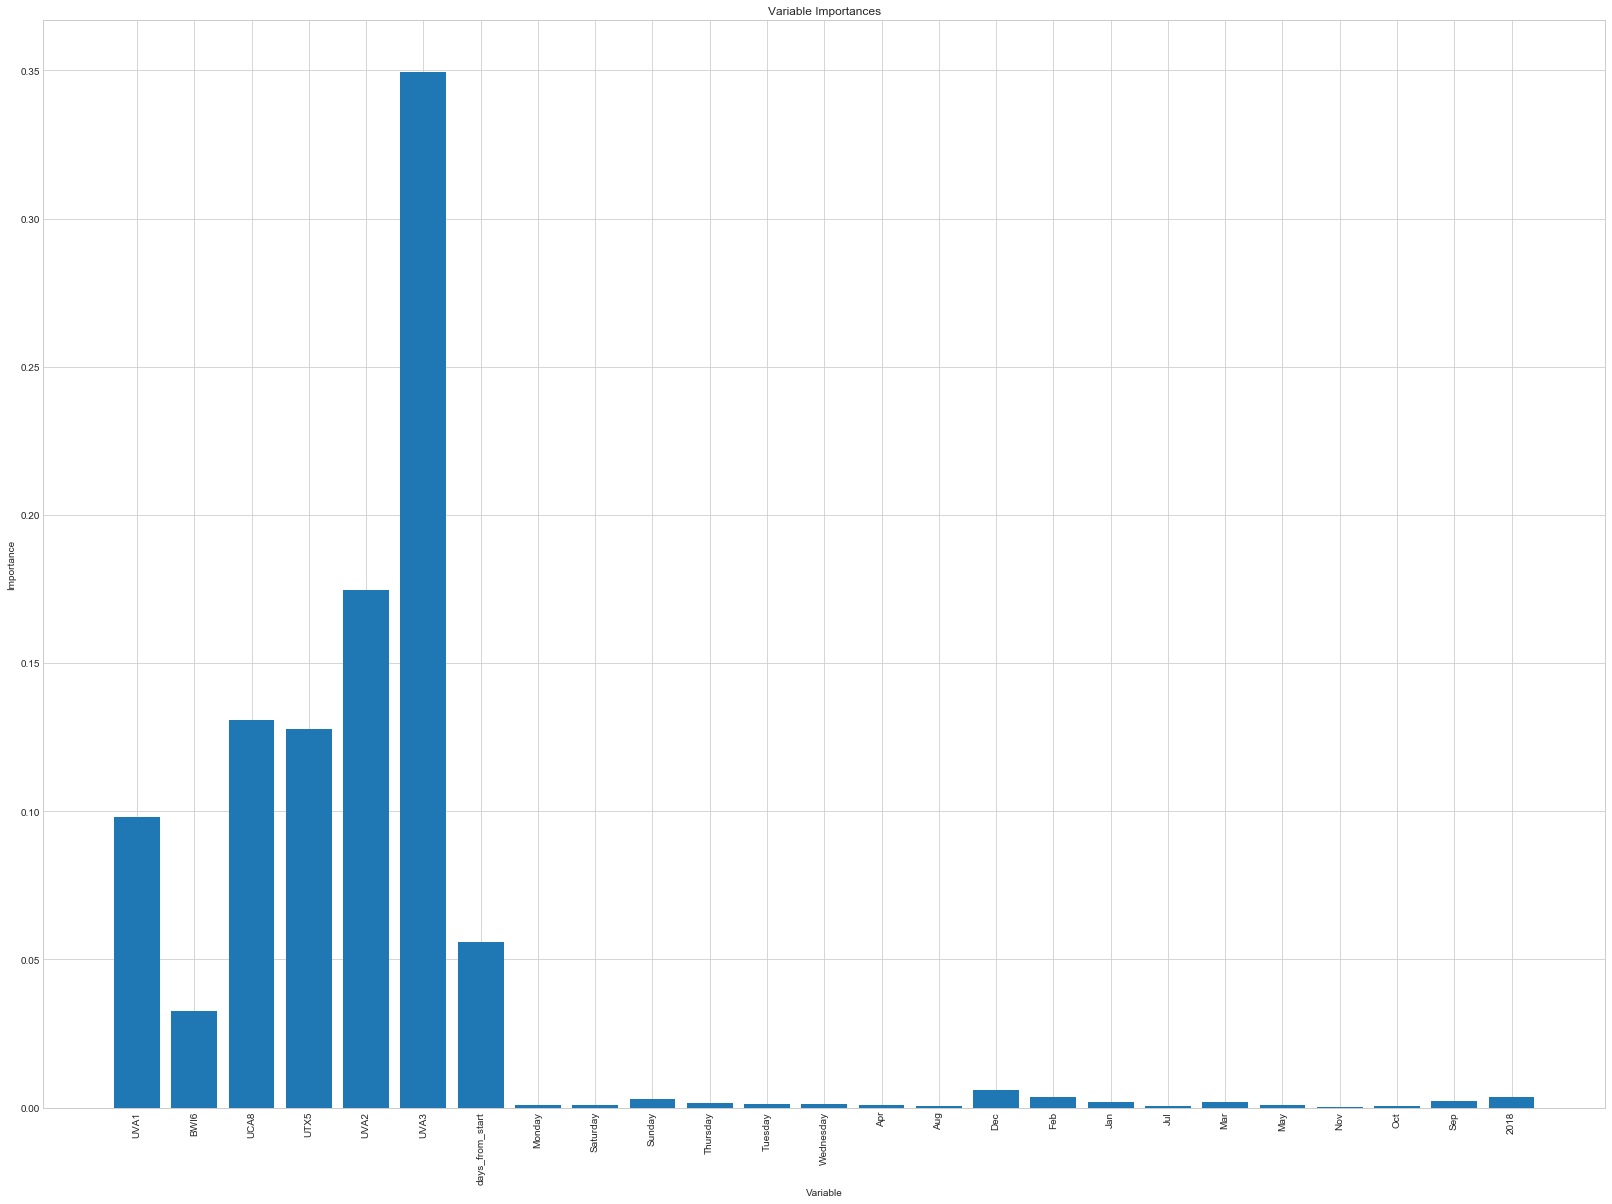

In [50]:
# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, var_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# XGBoost

In [51]:
xgb = XGBRegressor(max_depth=3, learning_rate=0.08, n_estimators=250, silent=True, n_jobs=3)
xgb.fit(Xtrain1, ytrain1)
print (xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=3, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [52]:
xgby_pred = xgb.predict(Xtrain2)

In [53]:
# Calculate the absolute errors
xgb_errors = abs(xgby_pred - ytrain2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xgb_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
xgb_mape = 100 * (xgb_errors / ytrain2)
print ('Median MAPE:', round(np.median(xgb_mape), 2), '%')

# Calculate and display accuracy
#xgb_accuracy = 100 - np.mean(xgb_mape)
#print('Accuracy:', round(xgb_accuracy, 2), '%.')

Mean Absolute Error: 1728.02 degrees.
Median MAPE: 5.49 %


In [54]:
xgb_importances = list(xgb.feature_importances_)

# List of tuples with variable and importance
xgb_feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(var_list, xgb_importances)]

# Sort the feature importances by most important first
xgb_feature_importances = sorted(xgb_feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in xgb_feature_importances];


Variable: UVA1                 Importance: 0.27000001072883606
Variable: BWI6                 Importance: 0.14000000059604645
Variable: UTX5                 Importance: 0.14000000059604645
Variable: UCA8                 Importance: 0.10999999940395355
Variable: days_from_start      Importance: 0.10999999940395355
Variable: UVA2                 Importance: 0.09000000357627869
Variable: UVA3                 Importance: 0.07000000029802322
Variable: Mar                  Importance: 0.019999999552965164
Variable: Saturday             Importance: 0.009999999776482582
Variable: Sunday               Importance: 0.009999999776482582
Variable: Thursday             Importance: 0.009999999776482582
Variable: Apr                  Importance: 0.009999999776482582
Variable: Feb                  Importance: 0.009999999776482582
Variable: Sep                  Importance: 0.009999999776482582
Variable: Monday               Importance: 0.0
Variable: Tuesday              Importance: 0.0
Variable: Wednesd

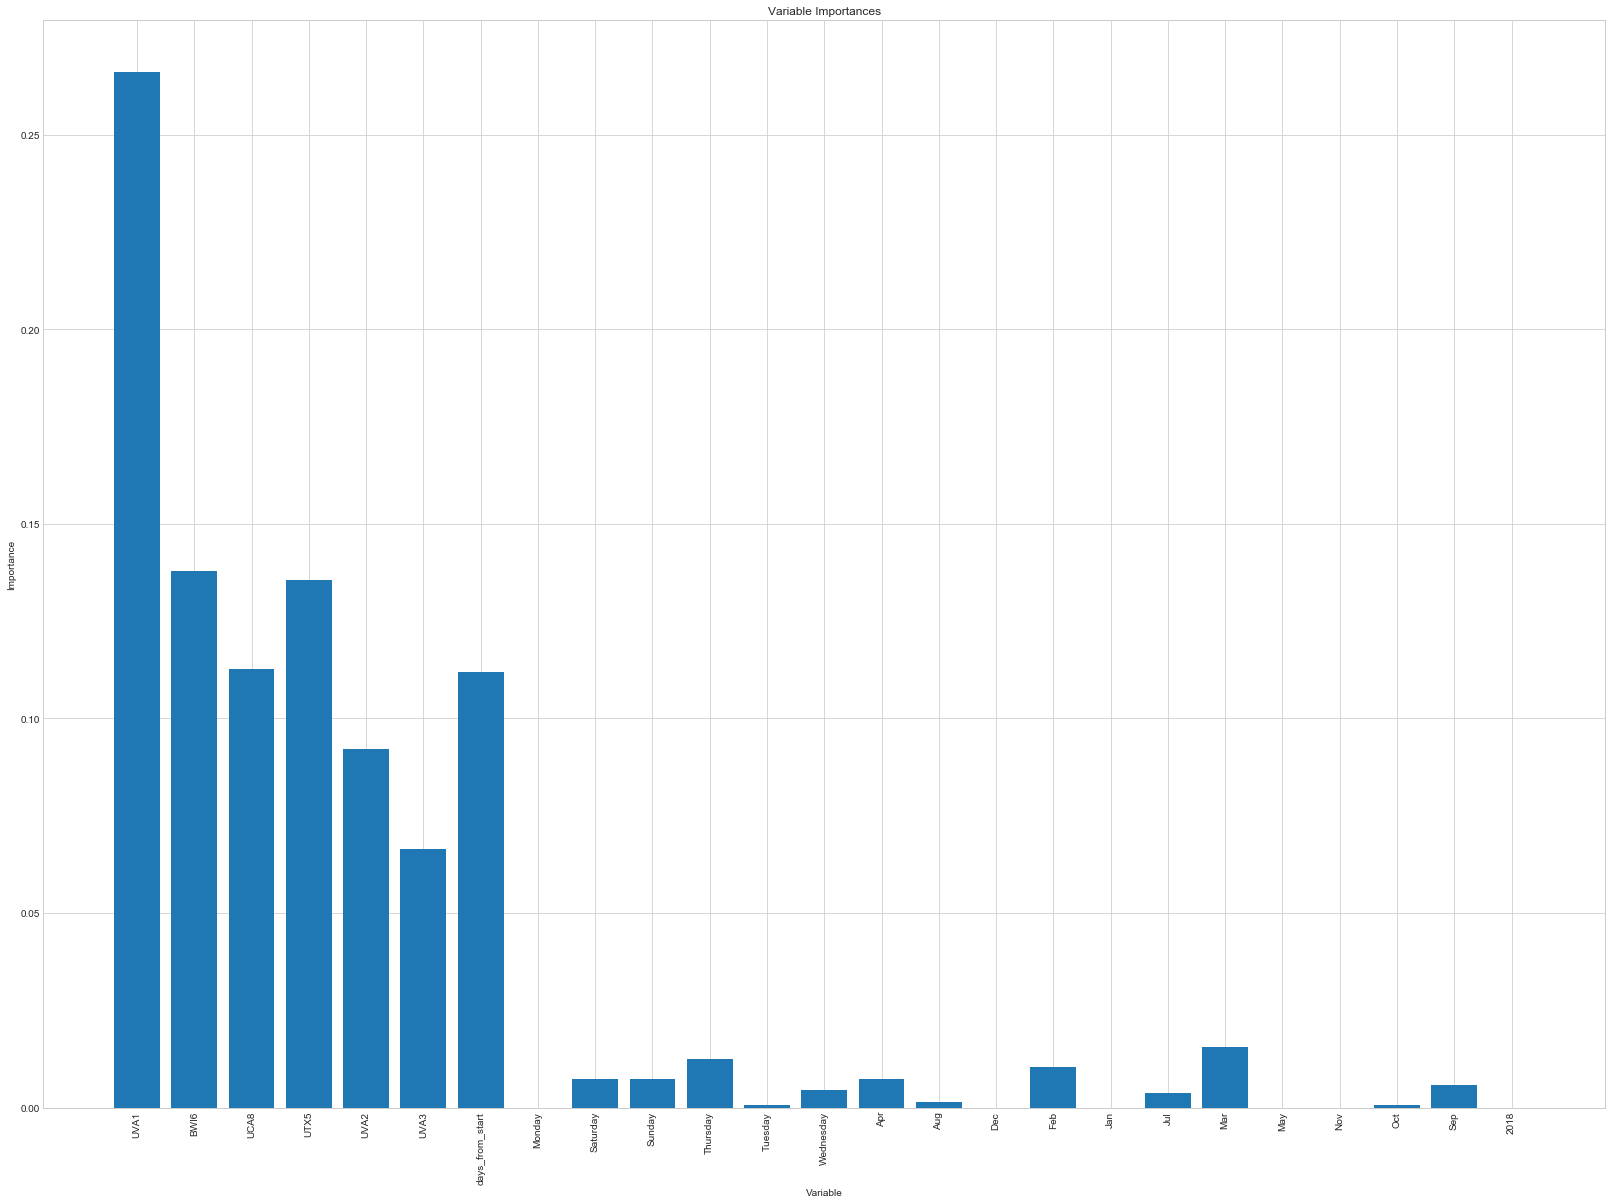

In [55]:
# list of x locations for plotting
xgb_values = list(range(len(xgb_importances)))

# Make a bar chart
plt.bar(xgb_values, xgb_importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(xgb_values, var_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [56]:
xgb_pred = xgb.predict(Xtest)

In [57]:
np.savetxt("xgb.csv", xgb_pred, delimiter=",")

# Combined Model

In [58]:
comby_pred = (0.333*LMy_pred) + (0.333*rfy_pred) + (0.333*xgby_pred)
comby_pred

array([19033.24921219, 29930.74698559, 30370.7066785 , 19533.06833021,
       21591.78395498, 20443.43448929, 21167.33238511, 19370.37675882,
       26177.11058909, 18573.07830764, 26313.40472079, 20265.54910843,
       21877.82723256, 25686.27481563, 19903.60021876, 29010.70525416,
       21906.59863515, 18795.16110561, 27345.64192037, 21470.71315891,
       25601.06819115, 26289.52525097, 21804.60391112, 19161.74182686,
       22285.95380778, 19792.36881903, 18286.72698187, 17920.02282709,
       39714.89090929, 36021.3478573 , 25654.74015676, 21534.55629239,
       30269.73937429, 27607.96746289, 28627.34730836, 26712.26206807,
       23565.43355766, 25772.07657234, 22436.52878577, 19437.72602263,
       21157.81721876, 21053.54869382, 19104.69670447, 28905.57083229,
       20116.38611694, 27500.75701918, 18355.52962062, 24286.89568456,
       23787.03603924, 24152.60518821, 17277.85349667, 23304.75293918,
       24354.14916485, 21251.21973278, 20307.00740347, 25460.3324251 ,
      

In [59]:
# Calculate the absolute errors
comb_errors = abs(comby_pred - ytrain2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(comb_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
comb_mape = 100 * (comb_errors / ytrain2)
print ('Median MAPE:', round(np.median(comb_mape), 2), '%')

Mean Absolute Error: 1672.19 degrees.
Median MAPE: 4.84 %


In [60]:
comb_pred = (0.333*LM_pred) + (0.333*rf_pred) + (0.333*xgb_pred)
comb_pred

array([24179.43625117, 24520.27893814, 18230.61740803, 18183.16017663,
       18721.22624611, 19597.53240089, 22663.14987554, 24002.74686778,
       23621.65580878, 22230.08009572, 18649.62240274, 17949.24882375,
       23032.18115489, 23069.64339026, 25300.83210098, 24202.79671778,
       19001.66048942, 21344.62313892, 26273.80163087, 13583.40842713,
       24943.61555932, 23829.24746132, 26487.91091666, 23070.32047391,
       20143.02720235, 22092.62772703, 21997.24523407, 24561.5432697 ,
       25089.39721931, 27530.37903146, 19595.55709386, 19967.00470514,
       21181.2751152 , 19730.38696766, 22445.08896861, 26535.12202746,
       24697.98138902, 19516.16248169, 21976.00504356, 20068.98938446,
       22009.32175053, 24168.84212322, 28003.51311651, 28276.04097511,
       21174.91427601, 23259.39623317, 23434.27227836, 26883.41726109,
       28339.88988983, 33086.26553383, 58097.47595001, 70289.6329134 ,
        3019.10437987, 26752.78110588, 21503.7605186 , 24851.25972049,
      

In [61]:
np.savetxt("comb.csv", comb_pred, delimiter=",")

# Redoing for UVA1 without UMD1

In [111]:
Train2 = train_df2.iloc[0:348, :]
Test2 = train_df2.iloc[348:502, :] 
Train2_df = pd.DataFrame(Train2)
Test2_df = pd.DataFrame(Test2)
Train2_df

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
0,26075.45,38233.83,80005.13,17891.49,27269.96,23130.53,25968.89,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,29908.66,48583.44,72548.06,19050.69,30470.17,28161.03,30398.07,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,32321.58,43901.46,77793.57,20206.09,42261.53,29656.31,31905.91,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29636.56,41112.54,72566.10,14479.73,27939.04,25245.36,33366.98,3.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,28666.94,47886.89,55129.20,17260.69,29162.23,31066.69,32744.96,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,24445.24,40353.85,52848.30,19448.10,37150.38,28048.29,29798.16,5.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,30787.56,55832.12,66154.38,27877.58,57117.80,33582.25,35903.70,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,45942.26,71721.52,73365.15,35044.37,60559.16,43227.13,48423.76,7.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,76919.39,105447.14,70848.69,54465.23,85958.74,77579.22,73526.24,8.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,81834.80,114736.28,27620.91,69926.39,86055.93,82427.66,78166.87,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
Test2_df

,UMD1,UVA1,BWI6,UCA8,UTX5,UVA2,UVA3,days_from_start,Monday,Saturday,...,Feb,Jan,Jul,Mar,May,Nov,Oct,Sep,2018,2019
348,0.0,43146.73,84778.52,16039.29,18175.44,16435.21,21245.65,348.0,0,0,...,0,0,0,0,0,1,0,0,1,0
349,0.0,48497.45,79314.50,18184.61,18747.25,19130.41,18643.08,349.0,0,0,...,0,0,0,0,0,1,0,0,1,0
350,0.0,50570.67,93627.71,20298.59,22389.29,25025.44,21824.46,350.0,0,0,...,0,0,0,0,0,1,0,0,1,0
351,0.0,56995.45,105347.50,27330.11,25884.10,28926.11,26768.54,351.0,0,1,...,0,0,0,0,0,0,0,0,1,0
352,0.0,61180.42,180808.34,23993.45,23779.94,29065.51,26484.25,352.0,0,0,...,0,0,0,0,0,0,0,0,1,0
353,0.0,41352.85,114805.08,17089.14,17092.85,18868.06,20281.53,353.0,1,0,...,0,0,0,0,0,0,0,0,1,0
354,0.0,39858.46,84827.24,15837.02,19070.95,21074.56,19063.85,354.0,0,0,...,0,0,0,0,0,0,0,0,1,0
355,0.0,44932.69,61359.95,16878.71,21787.13,21132.58,20648.56,355.0,0,0,...,0,0,0,0,0,0,0,0,1,0
356,0.0,40386.88,74419.11,18113.78,21048.86,21076.66,18982.72,356.0,0,0,...,0,0,0,0,0,0,0,0,1,0
357,0.0,50225.11,89154.69,15087.55,22789.04,23551.95,23878.75,357.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [113]:
XtrainVA = Train2_df.iloc[:, 2:26]
ytrainVA = Train2_df['UVA1']
XtestVA = Test2_df.iloc[:, 2:26]
ytestVA = Test2_df['UVA1']

#Xtrain, ytrain, Xtest, ytest = Xtrain, ytrain, Xtest, ytest

In [114]:
#Set train and test set
XtrainVA1, XtrainVA2, ytrainVA1, ytrainVA2 = train_test_split(XtrainVA, ytrainVA, test_size=.20, random_state=0)

In [115]:
#LINEAR MODEL
lmVA = LinearRegression()

lmVA.fit(XtrainVA1, ytrainVA1)

print (lmVA.score(XtrainVA1, ytrainVA1))

0.8840813578625786


In [116]:
LMVAy_pred = lmVA.predict(XtrainVA2)
LMVAy_pred

array([55335.00053956, 33879.34800274, 47497.9239482 , 36141.84517845,
       32277.31970456, 41608.50730417, 48768.88893441, 35512.47365508,
       40713.3731146 , 36893.11175348, 40225.33048763, 35718.6262242 ,
       42895.47520747, 32953.26450533, 49986.61165582, 36937.64272087,
       36995.37211186, 48256.54703225, 41205.4029621 , 34958.97647248,
       46765.48636278, 33172.97212876, 51406.86765959, 36800.68561616,
       38769.86276094, 33359.24112692, 50714.76121176, 38210.26002287,
       42195.59460858, 39367.19313122, 49313.0038475 , 44995.74538329,
       38334.12130487, 46936.38703415, 39895.65894494, 49376.85242559,
       36398.75108345, 37310.94754803, 51949.83884803, 23626.31727487,
       33327.08669993, 31711.98400581, 34704.77829081, 39132.68255197,
       38451.71242027, 39779.60291418, 38038.84992419, 42213.21156859,
       53919.89667147, 48738.71545099, 44267.32321507, 36649.74852593,
       33473.76585803, 69544.85231744, 49119.59512401, 45442.28338437,
      

In [117]:
#Mean Absolute Errors
lmVAerrors = abs(LMVAy_pred - ytrainVA2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(lmVAerrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
lmVAy_mape = 100 * (lmVAerrors / ytrainVA2)
print ('Median MAPE:', round(np.median(lmVAy_mape), 2), '%')

Mean Absolute Error: 2527.37 degrees.
Median MAPE: 4.79 %


In [118]:
LMVA_pred = lmVA.predict(XtestVA)
LMVA_pred
np.savetxt("LMVA.csv", LMVA_pred, delimiter=",")

In [119]:
#RF MODEL
# Instantiate model 
rfVA = RandomForestRegressor(n_estimators= 1000, random_state=42)

# Train the model on training data
rfVA.fit(XtrainVA1, ytrainVA1)

# Use the forest's predict method on the test data
rfVAy_pred = rfVA.predict(XtrainVA2)

In [120]:
#Mean Absolute Errors
rfVAerrors = abs(rfVAy_pred - ytrainVA2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(rfVAerrors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
rfVA_mape = 100 * (rfVAerrors / ytrainVA2)
print ('Median MAPE:', round(np.median(rfVA_mape), 2), '%')

Mean Absolute Error: 2952.72 degrees.
Median MAPE: 5.53 %


In [121]:
# Use the forest's predict method on the test data
rfVA_pred = rfVA.predict(XtestVA)
rfVA_pred
np.savetxt("rfVA.csv", rfVA_pred, delimiter=",")

In [122]:
#XGBOOST MODEL
xgbVA = XGBRegressor(max_depth=3, learning_rate=0.08, n_estimators=250, silent=True, n_jobs=3)
xgbVA.fit(XtrainVA1, ytrainVA1)
xgbVAy_pred = xgbVA.predict(XtrainVA2)

In [123]:
# Calculate the absolute errors
xgbVA_errors = abs(xgbVAy_pred - ytrainVA2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(xgbVA_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
xgbVA_mape = 100 * (xgbVA_errors / ytrainVA2)
print ('Median MAPE:', round(np.median(xgbVA_mape), 2), '%')

Mean Absolute Error: 2707.72 degrees.
Median MAPE: 5.06 %


In [124]:
xgbVA_pred = xgbVA.predict(XtestVA)
np.savetxt("xgbVA.csv", xgbVA_pred, delimiter=",")

In [125]:
#COMB MODEL
combVAy_pred = (0.333*LMVAy_pred) + (0.333*rfVAy_pred) + (0.333*xgbVAy_pred)

# Calculate the absolute errors
combVA_errors = abs(combVAy_pred - ytrainVA2)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(combVA_errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
combVA_mape = 100 * (combVA_errors / ytrainVA2)
print ('Median MAPE:', round(np.median(combVA_mape), 2), '%')

Mean Absolute Error: 2643.72 degrees.
Median MAPE: 5.16 %


In [126]:
combVA_pred = (0.333*LMVA_pred) + (0.333*rfVA_pred) + (0.333*xgbVA_pred)
np.savetxt("combVA.csv", combVA_pred, delimiter=",")